## Create Pipeline for run and comparing models


In [1]:
# Generic Dependencies
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
import os

# Plotting Libraries
from matplotlib import pyplot as plt
import seaborn as sns

# SKLearn Libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score,cross_validate, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, LassoCV


from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

#XGBoost libraries
import xgboost as xgb

# import generateXdata.py to prepare the data
from generateXdata import generateX
# from generateXdata_withVocab import generateX


In [2]:
# gobal variables
dataFilePath = "dataforfinalproject"
filename = "RECS_COMBINED_DATA.csv"
cols_file = "Final_Columns_withCat.csv"

 

# delcare target variables
target = {"BTU":"TOTALBTU", "DOLLAR":"TOTALDOLLAR"}
modelsList = {"LR": "Linear Regression", 
          "CLasso": "Classic Lasso", 
          "CV_Lasso":"Lasso with CV",          
          "RF":"Random Forest", 
          "XG":"XGBoost",
          "EN_GR" : "ElasticNet with GridSearch",}

# modelsList = {"LR": "Linear Regression", 
#           "CLasso": "Classic Lasso", 
#           "CV_Lasso":"Lasso with CV", 
#             "RF":"Random Forest",
#           "XG":"XGBoost"}

# common model params
folds = 5
seed = 30
test_size = 0.2






### Prepare Data

In [3]:
X = {}
y = {}
vocab = {}
# obtain features contributing to the Y = BTU or DOllar
for t, col in target.items():
    print(f"\nExtracting data for target : {t}........\n")
    X[t], vocab[t] = generateX(ohe = True, target = t)
    y[t] = pd.read_csv(os.path.join(dataFilePath,filename), low_memory = False)[col]
    


Extracting data for target : BTU........

 X Features shape : (22591, 87)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROTHERM', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'AGECENAC', 'USECENAC', 'NUMBERAC', 'WWACAGE', 'USEWWAC', 'FUELH2O', 'WHEATAGE', 'WHEATSIZ', 'LGTOUTNUM', 'ESDISHW', 'PGASHEAT', 'WOODAMT'] 

Duplicate Count : 0
shape of X is (22591, 79)

Extracting data for target : DOLLAR........

 X Features shape : (22591, 87)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROT

In [4]:
print(f"Shape of X values for DOLLAR as target : {X['DOLLAR'].shape}")
print(f"Shape of X values for BTU as target : {X['BTU'].shape}")
print(f"Shape of y values for DOLLAR as target : {y['DOLLAR'].shape}")
print(f"Shape of y values for DOLLAR as target : {y['BTU'].shape}")


Shape of X values for DOLLAR as target : (22591, 86)
Shape of X values for BTU as target : (22591, 79)
Shape of y values for DOLLAR as target : (22591,)
Shape of y values for DOLLAR as target : (22591,)


### Define model functions with default params (no configuration changes)


In [5]:
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('LassoCV', LassoCV()))
models.append(('RF', RandomForestRegressor()))
models.append(('xgb', xgb.XGBRegressor(objective = "reg:linear")))
models.append(('eNet', ElasticNet()))

In [6]:
# evaluate each model in turn
results_mse = []
results_r2 = []
names = []
scoring = {'mse': 'neg_mean_squared_error',
           'r2': 'r2',
           'exp_var': 'explained_variance'}

### Create the list of Models that will be run in sequence


In [7]:
for name, model in models:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_validate(model, X["BTU"], y["BTU"], cv=kfold, scoring=scoring)
    print(sorted(cv_results.keys())  )
    results_mse.append(cv_results['test_mse'])
    results_r2.append(cv_results['test_r2'])
    names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']


In [8]:
results_mse

[array([ -952760.8099058 ,  -367778.73284736,  -410009.04398271,
        -1952323.83740574, -8761348.45082939]),
 array([ -941047.45388619,  -364350.02999414,  -405238.07482367,
        -1952002.33290176, -8775656.86436385]),
 array([-19924102.57573766, -15747575.19525645, -13716863.66572396,
        -18285262.67601992, -18871757.20081091]),
 array([ -6.31116706e+07,  -1.66819693e+08,  -5.17851377e+07,
         -7.09462377e+07,  -2.88375369e+07]),
 array([ -6.99887209e+07,  -1.14597186e+08,  -5.45326017e+07,
         -6.16415769e+07,  -6.72969597e+07]),
 array([ -990923.72697807,  -311454.54549171,  -340016.14225851,
        -1980812.49893294, -8878068.57513217])]

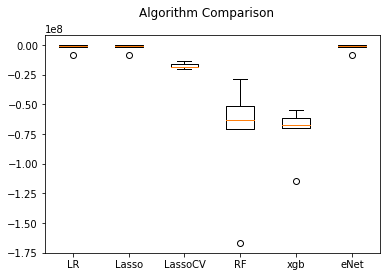

In [9]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_mse)
ax.set_xticklabels(names)
plt.show()

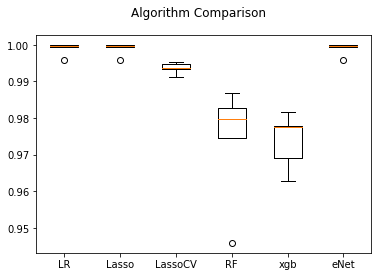

In [10]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_r2)
ax.set_xticklabels(names)
plt.show()

In [11]:
class ml_models_tuned(object):
    def __init__(self, X, y, seed, folds, test_size, early_stop):
        self.X = X
        self.y = y
        self.seed = seed
        self.folds = folds
        self.test_size = test_size
        self.early_stop = early_stop
        
        self.dMatrix = xgb.DMatrix(data = self.X,label = self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, random_state = self.seed, 
                                                                              test_size = self.test_size)
    def ret_LR_tunedModel(self):        
        model = LinearRegression()
        print(f"Best Linear Regression model {model}")
        return model
    
    def ret_Classo_tunedModel(self):
        print("\n Begining to tune Lasso Regression Model.................................\n")
        # perform a grid search with different alpha values to find the best fit
#         model = Lasso()
#         alpha=np.arange(0.0,0.05,.003)
        
#         param_grid = [{'alpha':alpha}]
#         pricing_grid  = GridSearchCV(model, param_grid, cv=5,scoring='r2')
#         pricing_grid.fit(self.X_train, self.y_train)
        
#         model = pricing_grid.best_estimator_
        model = Lasso(alpha=0.01)
        print(f"Best Lasso model with alpha = 0.01 is {model}")
        return model
    
    def ret_LassoCV_tunedModel(self):
        lasso = Lasso(max_iter=10000, normalize=True)
        lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
        lassocv.fit(self.X_train, self.y_train)        
        lasso.set_params(alpha=lassocv.alpha_)
        
        model = lasso
        print(f"Best LassoCV model with alpha {lassocv.alpha_} is {model}")
        return model
    
    def ret_RF_tunedModel(self):
        model = RandomForestRegressor(n_estimators = 50, random_state = self.seed, max_depth = 11)
        print(f"Best RF model obtained is with n_estimators at 50 and max_depth at 11 is {model}")
        return model
    
    def ret_xgb_tunedModel(self):
        model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.25,min_child_weight=3,
                max_depth = 5, alpha = 10, n_estimators = 150, subsample = 0.8, silent = 1)
        
        xgb_param = model.get_xgb_params()
        cvresult = xgb.cv(params = xgb_param, dtrain = self.dMatrix, num_boost_round=model.get_params()['n_estimators'], 
                          nfold=self.folds, metrics='rmse', early_stopping_rounds=self.early_stop, verbose_eval=False)
        
        model.set_params(n_estimators=cvresult.shape[0])
        
        print(f"Best xgBoost model obtained is with n_estimators at {cvresult.shape[0]} and learning_rate at 0.25 is {model}")
    
        return model
    
    def ret_eNet_tunedModel(self):
        alpha=np.arange(0.0,0.05,.003)

        enet = ElasticNet()
        
#         print("Configuring and finding best model using GridSearchCV.....................\n")        
        param_grid = [{'alpha':alpha}]
        enet_grid  = GridSearchCV(enet, param_grid, cv=self.folds)
        
        print(f"Best elasticNet model obtained is {enet_grid}")
        return enet_grid
        
    def linearmodel(self):
        print("Begining to run Linear regression Model.................................\n")
                
        print("Configuring the model.....................\n")
        model = self.ret_LR_tunedModel()
        
        print("Fit train data to the model.....................\n")
        model.fit(self.X_train, self.y_train)
        
        print("Predict Y values for test data.....................\n")
        predictions_train = model.predict(self.X_train)
        predictions= model.predict(self.X_test)
        
        RMSE_train = np.sqrt(mean_squared_error(self.y_test, predictions))
        r2_train = model.score(self.X_test, self.y_test)
        
        RMSE_test = np.sqrt(mean_squared_error(self.y_test, predictions))
        r2_test = model.score(self.X_test, self.y_test)
        
        column_series = list(predictions)
        df_modelresults=pd.DataFrame()
        df_modelresults = df_modelresults.assign(LinearPredictedY=column_series)
        
        print("Linear Regression Model report")
        print("----------------------------------------------------------------\n")
        
        print("Test RMSE: %f" % (RMSE_test))
        print('The accuracy of the linear regressor is {:.2f} out of 1 on the testing data'.format(r2_test))
        
        plt.scatter(predictions_train, predictions_train - self.y_train, c="blue", label="Training Data")
        plt.scatter(predictions, predictions - self.y_test, c="orange", label="Testing Data")
        plt.legend()
        plt.hlines(y=0, xmin=self.y_test.min(), xmax=self.y_test.max())
        plt.title("Residual Plot")
        plt.show()
        
                
        return(predictions, RMSE_test, r2_test)
    
    def classic_lasso_model(self):
        print("\nBegining to run Classic Lasso regression Model (alpha = 0.01).................................\n")                
        print("Configuring and fit training data to the model.....................\n")
        lasso = self.ret_Classo_tunedModel().fit(self.X_train, self.y_train)
        
        print("Predict y values for train and test data.....................\n")
        predictions_train = lasso.predict(self.X_train)
        
        RMSE_train = np.sqrt(mean_squared_error(self.y_train, predictions_train))
        r2_train = lasso.score(self.X_train, self.y_train)
        
        predictions = lasso.predict(self.X_test)
        RMSE_test = np.sqrt(mean_squared_error(self.y_test, predictions))
        r2_test= lasso.score(self.X_test, self.y_test)
        
        print("Classic Lasso Regresion Model report")
        print("----------------------------------------------------------------\n")
        print("Train RMSE: %f" % (RMSE_train))
        print("Test RMSE: %f" % (RMSE_test))
        print('The accuracy of the Classic Lasso regressor is {:.2f} out of 1 on the training data'.format(r2_train))
        print('The accuracy of the Classic Lasso regressor is {:.2f} out of 1 on the test data'.format(r2_test))
        
        df_modelresults=pd.DataFrame(predictions,columns=['Classic_Lasso_predicted'])

        return(df_modelresults, RMSE_test,r2_test)
    
    def lasso_CV(self):
        print("\nBegining to run Lasso CV regression Model (alpha = determined by K-Folds).................................\n")                
        print("Run cross validation on training data to get best model iteration.....................\n")
        
#         X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)
        lasso = self.ret_LassoCV_tunedModel()
        
        print("Fit the best model from k-folds to training data................")
        lasso.fit(self.X_train, self.y_train)
        print("best model coefficients:")
        print(pd.Series(lasso.coef_).tolist())
        
        print("\nPredict data using testing data................")
        predictions = lasso.predict(self.X_test)
        RMSE_test = np.sqrt(mean_squared_error(self.y_test, predictions))
        r2 = lasso.score(self.X_test, self.y_test)
        
        print("Lasso CV Regresion Model report")
        print("----------------------------------------------------------------\n")
        
        print("Test RMSE: %f" % (RMSE_test))
        print('The accuracy of the LassoCV regressor is {:.2f} out of 1 on the test data'.format(r2))
        
        df_modelresults=pd.DataFrame(predictions,columns=['Lasso_CV_predicted'])
        
        return(df_modelresults,RMSE_test,r2)

    def RF_model(self):
        print("\nBegining to run RandomForest regression Model.................................\n")                
        print("Configuring and fit training data to the model.....................\n")

        rf = self.ret_RF_tunedModel()

        # Train the model on training data
        rf.fit(self.X_train, self.y_train)

        print("Predict y values for train and test data.....................\n")
        predictions = rf.predict(self.X_test)
        RMSE_test = np.sqrt(mean_squared_error(self.y_test, predictions))
        r2_test = rf.score(self.X_test, self.y_test)

        predictions_train = rf.predict(self.X_train)
        RMSE_train = np.sqrt(mean_squared_error(self.y_train, predictions_train))
        r2_train = rf.score(self.X_train, self.y_train)

        print("RandomForest Regresion Model report")
        print("----------------------------------------------------------------\n")
        print("Train RMSE: %f" % (RMSE_train))
        print("Test RMSE: %f" % (RMSE_test))
        print('The accuracy of the RandomForest regressor is {:.2f} out of 1 on the training data'.format(r2_train))
        print('The accuracy of the RandomForest regressor is {:.2f} out of 1 on the test data'.format(r2_test))

        df_modelresults=pd.DataFrame(predictions,columns=['RandomForest_predictions'])

        return(df_modelresults, RMSE_test,r2_test)

    def xgb_model(self):
        print("Begining to run XGBoost Model.................................\n")
                
        print("Configuring the model.....................\n")
        
        model = self.ret_xgb_tunedModel()
        print("Fitting Train data to the model ")
        print("----------------------------------------------------------------\n")
        eval_set = [(self.X_train, self.y_train), (self.X_test, self.y_test)]
        model.fit(self.X_train, self.y_train,eval_metric=["rmse"], eval_set=eval_set, verbose=False)
        
        print("Predicting Y with test data")
        print("----------------------------------------------------------------\n")
        preds_train = model.predict(self.X_train)
        train_rmse = np.sqrt(mean_squared_error(self.y_train, preds_train))
        train_accur = model.score(self.X_train, self.y_train)

        preds = model.predict(self.X_test)
        rmse = np.sqrt(mean_squared_error(self.y_test, preds))
        accur = model.score(self.X_test, self.y_test)
        
        
        print("XGBoost Model report")
        print("----------------------------------------------------------------\n")
        print("Train RMSE: %f" % (train_rmse))
        print("Test RMSE: %f" % (rmse))
        print('The accuracy of the xgboost regressor is {:.2f} out of 1 on the training data'.format(train_accur))
        print('The accuracy of the xgboost regressor is {:.2f} out of 1 on the test data'.format(accur))
    
        # retrieve performance metrics and plot it
        results = model.evals_result()
        epochs = len(results['validation_0']['rmse'])
        x_axis = range(0, epochs)

        # plot regression error
        fig, axs = plt.subplots(figsize = (6,5))
        sns.lineplot(x_axis, results['validation_0']['rmse'], label='Train', ax = axs)
        sns.lineplot(x_axis, results['validation_1']['rmse'], label='Test', ax = axs)
        plt.legend()
        plt.ylabel('Regression Error')
        plt.title('XGBoost Regression Error')
        plt.show()

        return (pd.DataFrame(preds, columns = ['xgBoost_Predicted']),rmse, accur)
    
    def eNet_model(self):
        
        enet_grid  = self.ret_eNet_tunedModel()
        
        print("Fit train data to the best model.....................\n") 
        enet_grid.fit(self.X_train, self.y_train)
        
        print("Predict Y for test data.....................\n") 
        predictions = enet_grid.predict(self.X_test)
        
        RMSE = np.sqrt(mean_squared_error(self.y_test, predictions))
        r2 = enet_grid.score(self.X_test, self.y_test)
        #grid_results = pd.DataFrame(enet_grid.cv_results_) 

        print("ElasticNet Model report")
        print("----------------------------------------------------------------\n")
        
        print("Test RMSE: %f" % (RMSE))
        print('The accuracy of the elasticNet regressor is {:.2f} out of 1 on the test data'.format(r2))

        return (pd.DataFrame(predictions, columns = ['eNet_predicted']), RMSE, r2)
    
    def runModel(self, whichModel = "LR"):
        if(whichModel == "LR"):
            return self.linearmodel()
        elif(whichModel == "CLasso"):
            return self.classic_lasso_model()
        elif(whichModel == "CV_Lasso"):
            return self.lasso_CV()
        elif(whichModel == "EN_GR"):
            return self.eNet_model()
        elif(whichModel == "RF"):
            return self.RF_model()
        elif(whichModel == "XG"):
            return self.xgb_model()

    def get_y_test(self):
        return self.y_test

In [12]:
m = ml_models_tuned(X['BTU'], y["BTU"], seed, folds, test_size, early_stop = 20)
# prepare models
models_t = []
models_t.append(('LR', m.ret_LR_tunedModel()))
models_t.append(('Lasso', m.ret_Classo_tunedModel()))
models_t.append(('LassoCV', m.ret_LassoCV_tunedModel()))
models_t.append(('RF', m.ret_RF_tunedModel()))
models_t.append(('xgb', m.ret_xgb_tunedModel()))
models_t.append(('eNet', m.ret_eNet_tunedModel()))

Best Linear Regression model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 Begining to tune Lasso Regression Model.................................

Best Lasso model with alpha = 0.01 is Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best LassoCV model with alpha 0.27745475067932646 is Lasso(alpha=0.27745475067932646, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Best RF model obtained is with n_estimators at 50 and max_depth at 11 is RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
      

In [13]:
# evaluate each model in turn
results_mse_t = []
results_r2_t = []
names_t = []
scoring_t = {'mse': 'neg_mean_squared_error',
           'r2': 'r2',
           'exp_var': 'explained_variance'}

### Create the list of Models that will be run in sequence


In [14]:
for name, model in models_t:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_validate(model, X["BTU"], y["BTU"], cv=kfold, scoring=scoring_t)
    print(sorted(cv_results.keys())  )
    results_mse_t.append(cv_results['test_mse'])
    results_r2_t.append(cv_results['test_r2'])
    names_t.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']


In [15]:
results_mse_t

[array([ -952760.8099058 ,  -367778.73284736,  -410009.04398271,
        -1952323.83740574, -8761348.45082939]),
 array([ -930020.83744086,  -367742.01455448,  -409962.98379971,
        -1952324.95801797, -8762709.86517684]),
 array([ -837088.51395184,  -286687.29257622,  -322510.22405116,
        -1999892.87646554, -9211887.41122261]),
 array([ -7.77248536e+07,  -1.64670971e+08,  -5.80048372e+07,
         -8.06350694e+07,  -6.03812408e+07]),
 array([ -4.78529227e+07,  -1.07071341e+08,  -3.57061139e+07,
         -3.66673171e+07,  -2.42406447e+07]),
 array([ -956054.28691256,  -350058.09451875,  -388815.83378346,
        -1956329.21150864, -8785257.40985005])]

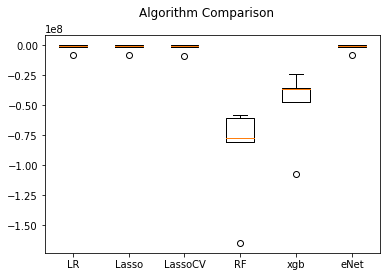

In [16]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_mse_t)
ax.set_xticklabels(names_t)
plt.show()

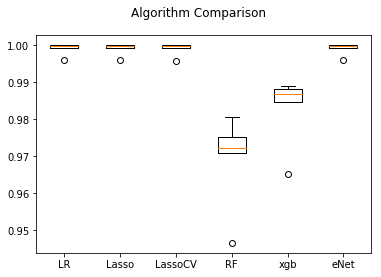

In [17]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_r2_t)
ax.set_xticklabels(names_t)
plt.show()

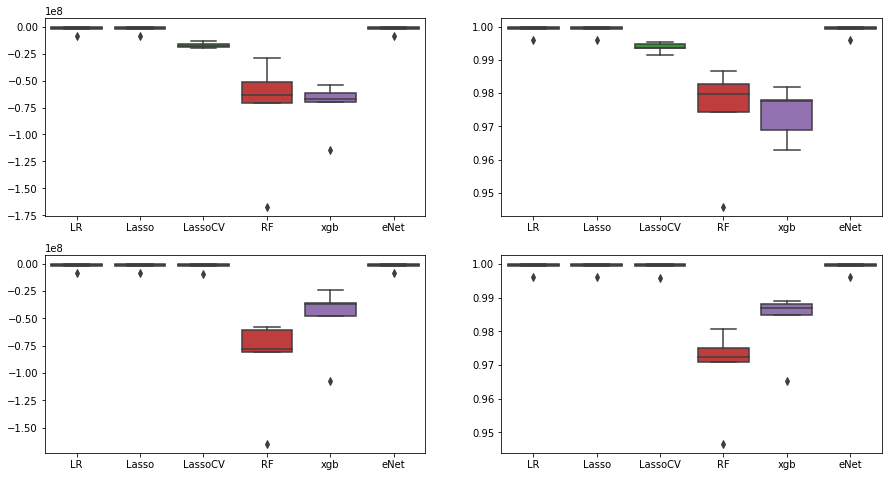

In [18]:
# plot categorical variables
fcols = 2
frows = 2
plt.figure(figsize=(15,4*frows))

plt.subplot(2,2,1)
sns.boxplot(names, results_mse)

plt.subplot(2,2,2)
sns.boxplot(names, results_r2)

plt.subplot(2,2,3)
sns.boxplot(names, results_mse_t)

plt.subplot(2,2,4)
sns.boxplot(names, results_r2_t)

In [ ]:
models_t[0]